In [1]:
import numpy as np
import maze as mz 
import problem_1 as pb1

# Problem 1: The Maze and the Random Minotaur

We start first by describing the maze as a numpy array. 

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

### P1.b.1. Solve the problem and illustrate an optimal policy for T = 20

In [3]:
# Create an environment maze
env = mz.Maze(maze, True)
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy = mz.dynamic_programming(env, horizon)
print(policy)

[[0. 0. 0. ... 0. 0. 0.]
 [4. 4. 4. ... 4. 4. 0.]
 [4. 4. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


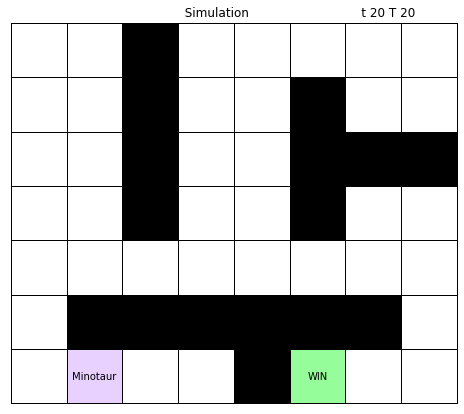

In [4]:
method = 'DynProg'
start = (0, 0, 6, 5)
path = env.simulate(start, policy, method, horizon)
mz.animate_solution(maze, path)

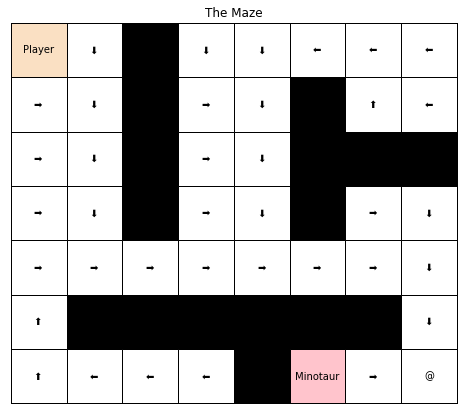

In [5]:
env.draw_optimal_policy(maze, (6, 5), policy)

In [6]:
prob, array = env.repeat_simulate(start, policy, 'DynProg', 100, 20)
print(prob)

0.83


### P1.b.2. Plot the maximal probability of exiting the maze as a function of T. (Assuming the minotour can stay) 

Completed simulation for T = 15, obtained exit prob = 0.720
Completed simulation for T = 18, obtained exit prob = 0.860
Completed simulation for T = 21, obtained exit prob = 0.880
Completed simulation for T = 24, obtained exit prob = 0.960
Completed simulation for T = 27, obtained exit prob = 0.950
Completed simulation for T = 30, obtained exit prob = 0.970
Completed simulation for T = 33, obtained exit prob = 0.990
Completed simulation for T = 36, obtained exit prob = 0.990


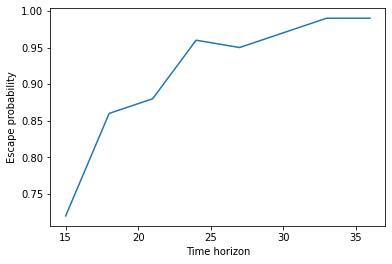

In [7]:
from matplotlib import pyplot as plt
N = 100
exit_prob = []
horizons = [i for i in range(15, 37, 3)]

for horizon in horizons:
    # Create an environment maze
    env = mz.Maze(maze, True)

    # Solve the MDP problem with dynamic programming
    V, policy = mz.dynamic_programming(env, horizon)

    # Repeat the simulation for N times
    prob, exit_time = env.repeat_simulate(start, policy, method, N)

    exit_prob.append(prob)

    print("Completed simulation for T = %s, obtained exit prob = %.3f" % (horizon, prob))

plt.plot(horizons, exit_prob)
plt.xlabel("Time horizon")
plt.ylabel("Escape probability")
plt.show()

### P1.b.3. Plot the maximal probability of exiting the maze as a function of T. (Assuming the minotour can not stay) 

In [8]:
# Create an environment maze
env = mz.Maze(maze, False)
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy = mz.dynamic_programming(env, horizon)
print(policy)

[[0. 0. 0. ... 0. 0. 0.]
 [2. 2. 2. ... 2. 2. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
method = 'DynProg'
start = (0, 0, 6, 5)

Completed simulation for T = 15, obtained exit prob = 1.000
Completed simulation for T = 18, obtained exit prob = 1.000
Completed simulation for T = 21, obtained exit prob = 1.000
Completed simulation for T = 24, obtained exit prob = 1.000
Completed simulation for T = 27, obtained exit prob = 1.000
Completed simulation for T = 30, obtained exit prob = 1.000
Completed simulation for T = 33, obtained exit prob = 1.000
Completed simulation for T = 36, obtained exit prob = 1.000


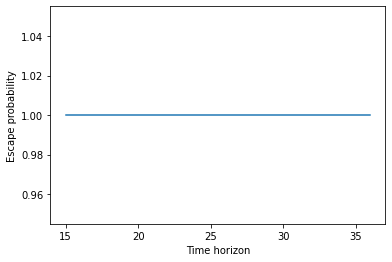

In [10]:
N = 100
exit_prob = []
horizons = [i for i in range(15, 37, 3)]
for horizon in horizons:
    # Create an environment maze
    env = mz.Maze(maze, False)

    # Solve the MDP problem with dynamic programming
    V, policy = mz.dynamic_programming(env, horizon)

    # Repeat the simulation for N times
    prob, exit_time = env.repeat_simulate(start, policy, method, N)

    exit_prob.append(prob)

    print("Completed simulation for T = %s, obtained exit prob = %.3f" % (horizon, prob))
    
plt.plot(horizons, exit_prob)
plt.xlabel("Time horizon")
plt.ylabel("Escape probability")
plt.show()

### 1.b.3 Estimate the probability of getting out alive using this policy by simulating 10 000 games.

In [11]:
### Assume now that your life is geometrically distributed with mean 30. 
# Modify the problem so as to derive a policy minimizing the expected time to exit the maze. 
# Motivate your new problem formulation. 

In [12]:
env = mz.Maze(maze, False)

gamma = 29 / 30
epsilon = 0.0001
# Solve the MDP problem with dynamic programming
V, policy = mz.value_iteration(env, gamma, epsilon)

# Repeat the simulation for N times
N = 10000
method = 'ValIter'
prob, exit_time = env.repeat_simulate(start, policy, method, N)
print("Maximal probability of getting out alive:", prob)

Maximal probability of getting out alive: 1.0
